In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Indian_automoble_buying_behavour_study_1.0.csv')

In [3]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [4]:
null_values = df.isnull().sum()
print(null_values)
     

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64


In [5]:
column_data_types = df.dtypes
print(column_data_types)

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
House Loan          object
Wife Working        object
Salary               int64
Wife Salary          int64
Total Salary         int64
Make                object
Price                int64
dtype: object


In [6]:
object_columns = df.select_dtypes(include='object')

for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in Profession:
['Salaried' 'Business']

Unique values in Marrital Status:
['Single' 'Married']

Unique values in Education:
['Post Graduate' 'Graduate']

Unique values in Personal loan:
['Yes' 'No']

Unique values in House Loan:
['No' 'Yes']

Unique values in Wife Working:
['No' 'Yes' 'm']

Unique values in Make:
['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']



In [7]:
unique_values_count = df.nunique()
print(unique_values_count)

Age                 22
Profession           2
Marrital Status      2
Education            2
No of Dependents     4
Personal loan        2
House Loan           2
Wife Working         3
Salary              24
Wife Salary         14
Total Salary        36
Make                 9
Price               10
dtype: int64


In [8]:
df['Wife Working'] = df['Wife Working'].replace('m', 'No')

In [9]:
unique_values_count = df.nunique()
print(unique_values_count)

Age                 22
Profession           2
Marrital Status      2
Education            2
No of Dependents     4
Personal loan        2
House Loan           2
Wife Working         2
Salary              24
Wife Salary         14
Total Salary        36
Make                 9
Price               10
dtype: int64


In [10]:
unique_count = df['Wife Working'].nunique()
unique_values = df['Wife Working'].unique()
print(unique_values)
print(unique_count)

['No' 'Yes']
2


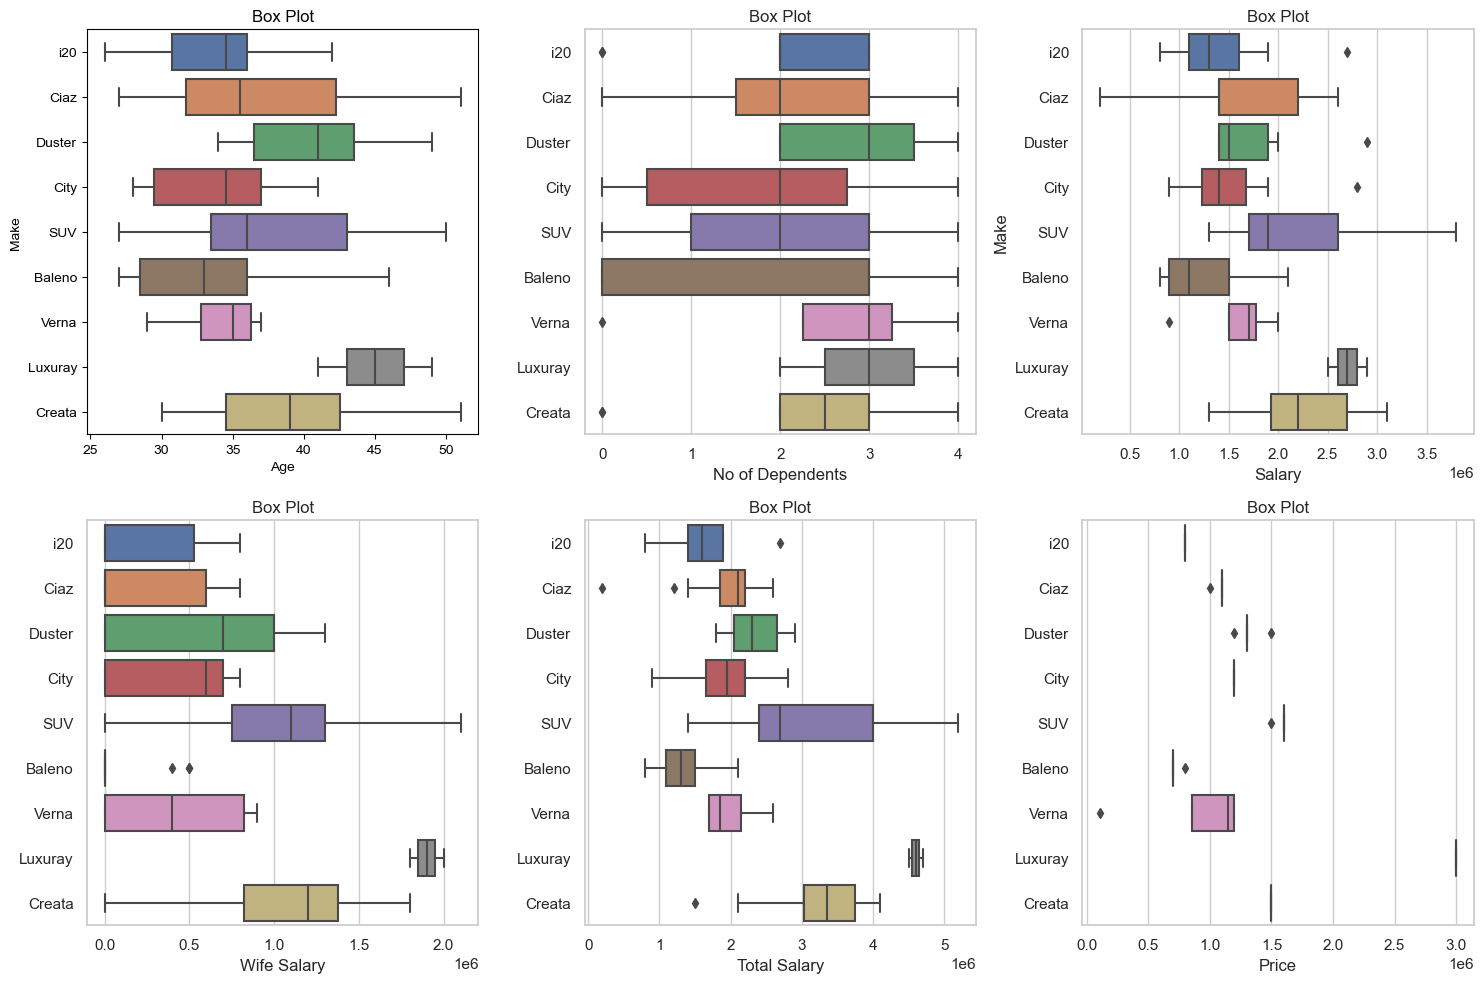

In [11]:
plt.figure(figsize=(15, 10))
n = 0
for i, col in enumerate(['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price'], 1):
    plt.subplot(2, 3, i)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.boxplot(x=col, y='Make', data=df)
    plt.ylabel("Make" if i == 1 or i == 3 else '')
    plt.title('Box Plot')

plt.tight_layout()
plt.show()
     

##  Observations 

(1) Younger individuals tend to choose less expensive cars, indicating a preference for affordability.

(2) Individuals with more dependents tend to favor vehicles that can accommodate additional passengers, such as SUVs.

(3) The distribution of salaries, when compared to the price plot, reveals a clear correlation. The median salary aligns closely with the median price of the vehicles, suggesting a strong and direct relationship between income and vehicle price.

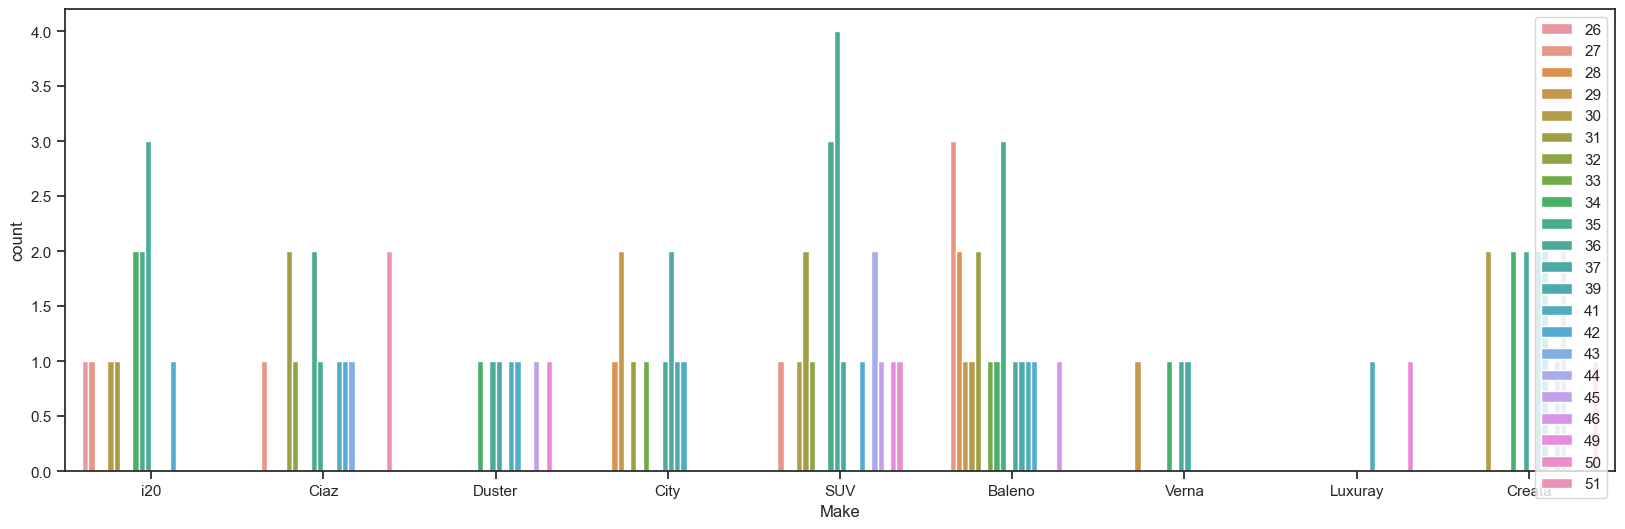

In [12]:
sns.set_theme(style="ticks", palette=None)
plt.figure(figsize=(20, 6))
sns.countplot(x="Make", data=df, hue="Age")
plt.legend(loc='upper right')

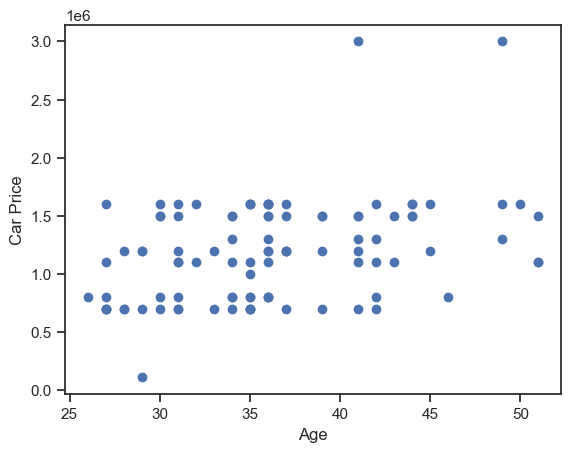

In [13]:
plt.xlabel('Age')
plt.ylabel('Car Price')
plt.scatter(df['Age'],df['Price'])
     

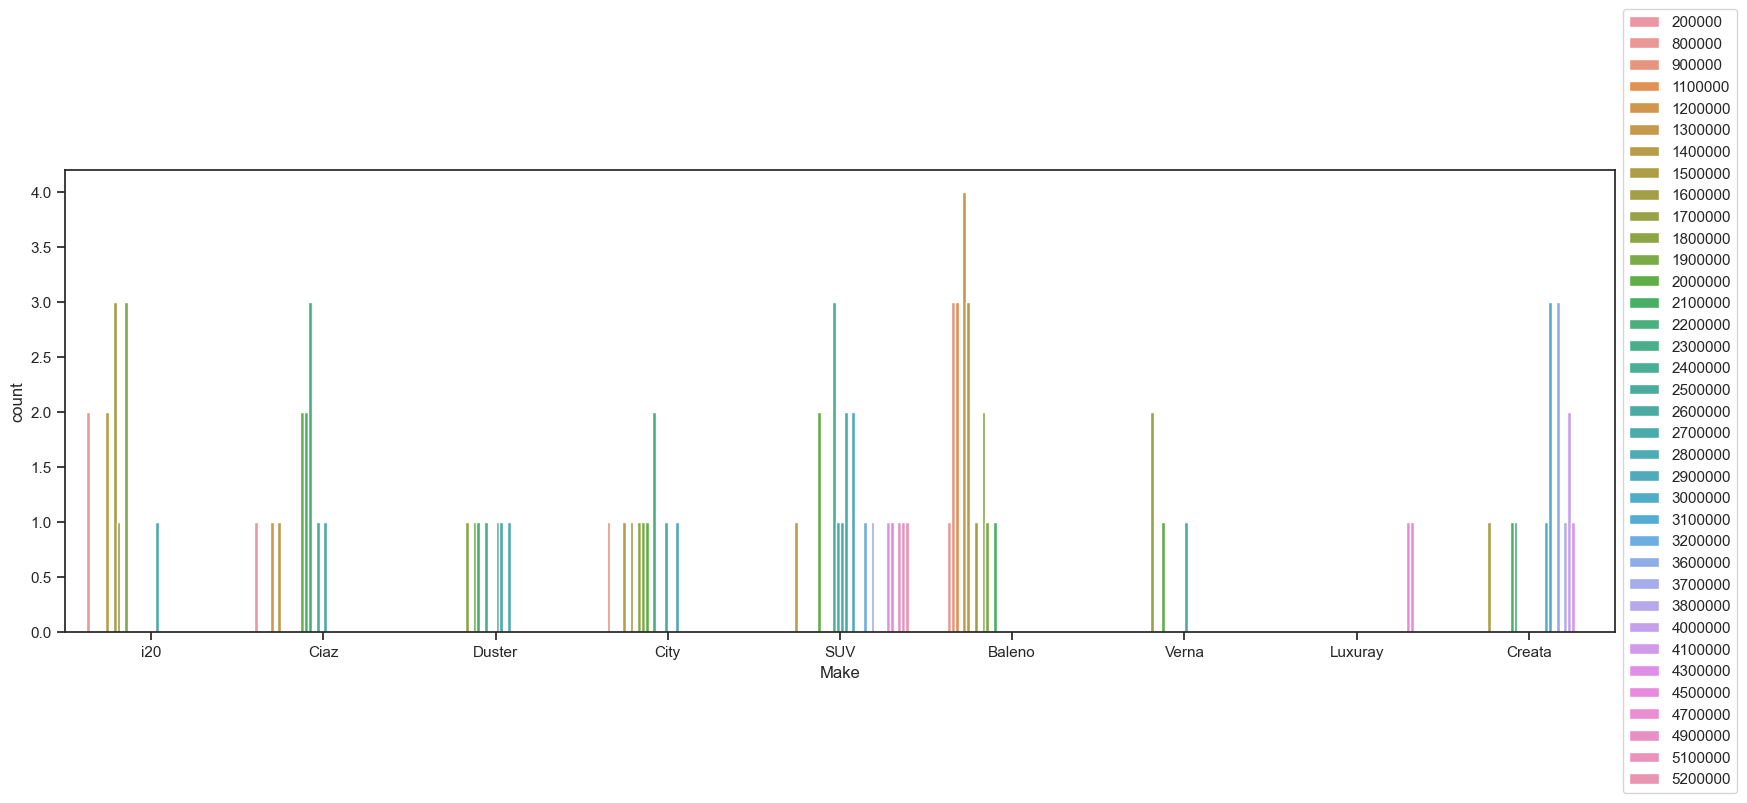

In [14]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Total Salary")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

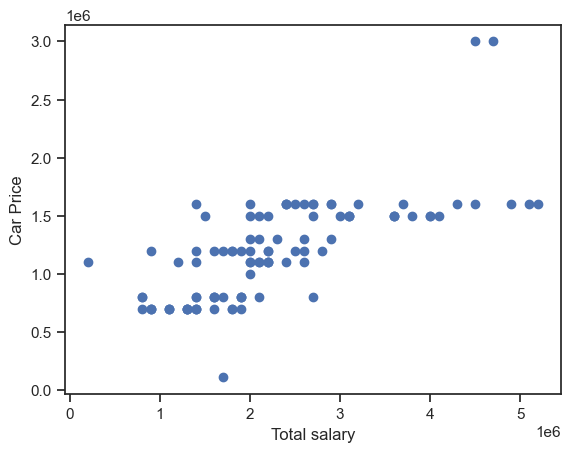

In [15]:
plt.xlabel('Total salary')
plt.ylabel('Car Price')
plt.scatter(df['Total Salary'],df['Price'])

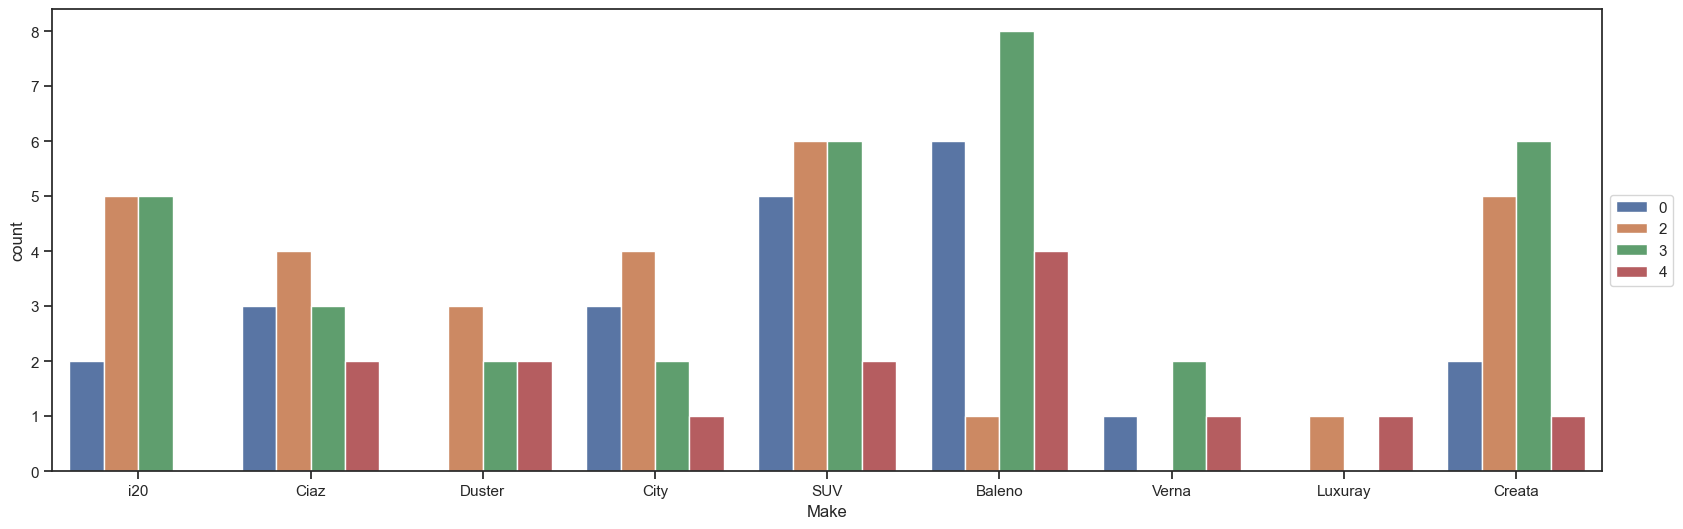

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="No of Dependents")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

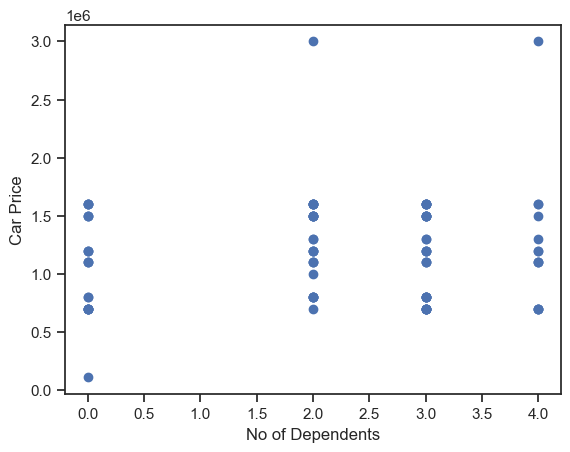

In [17]:
plt.xlabel('No of Dependents')
plt.ylabel('Car Price')
plt.scatter(df['No of Dependents'],df['Price'])

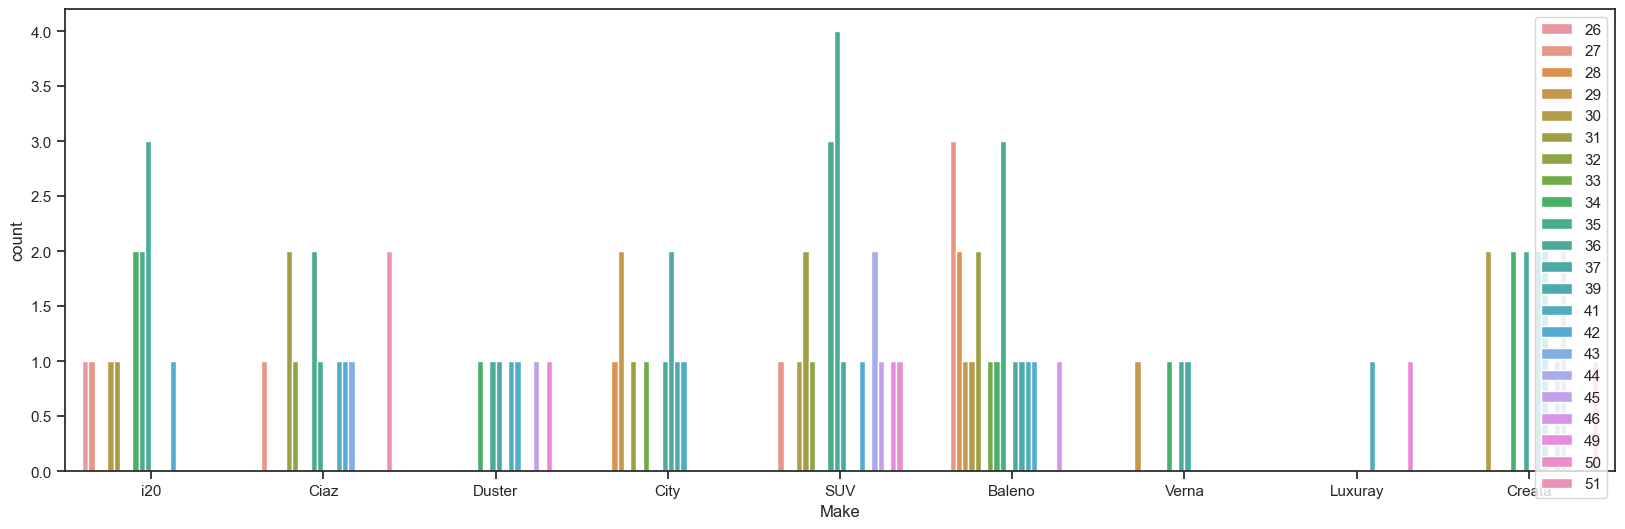

In [18]:
sns.set_theme(style="ticks", palette=None)
plt.figure(figsize=(20, 6))
sns.countplot(x="Make", data=df, hue="Age")
plt.legend(loc='upper right')

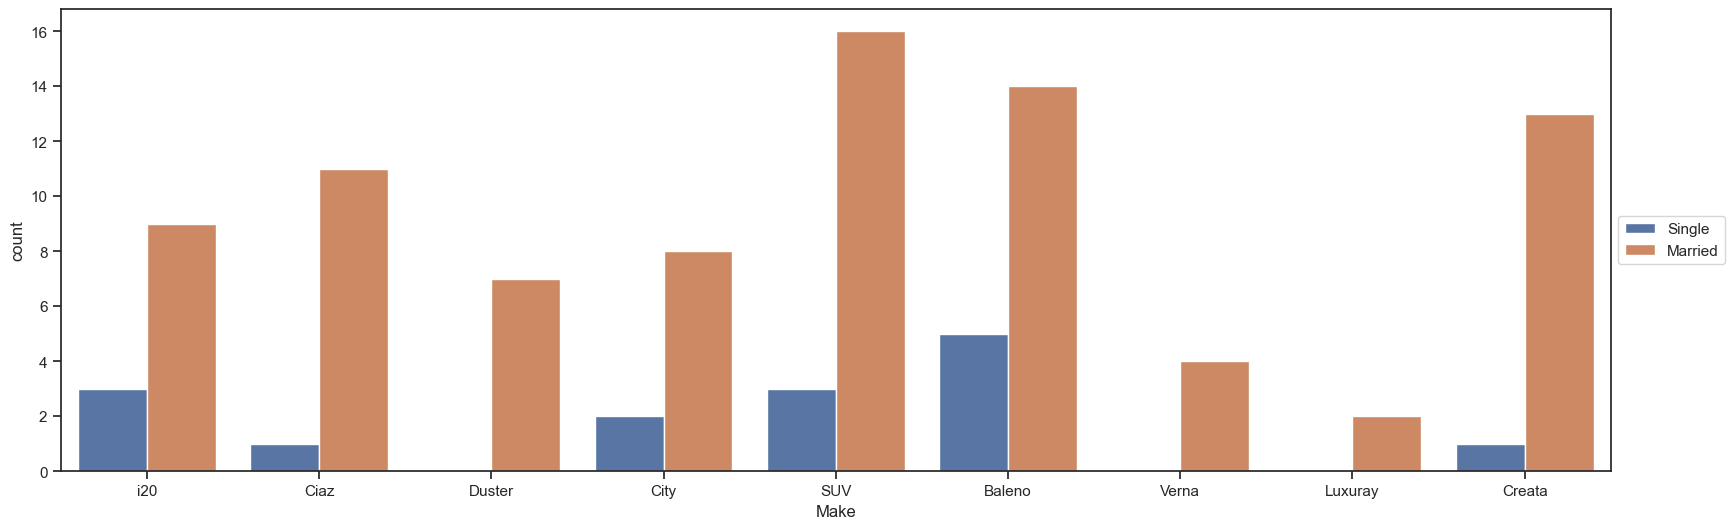

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Marrital Status")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

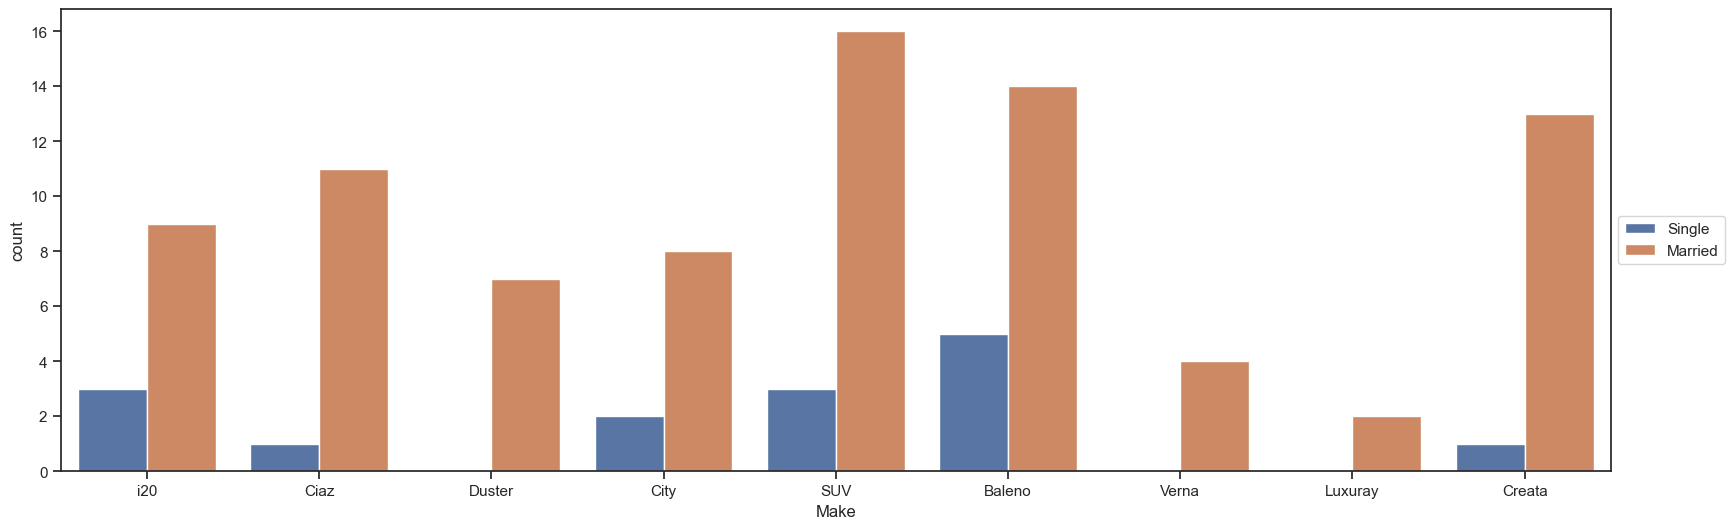

In [20]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Marrital Status")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

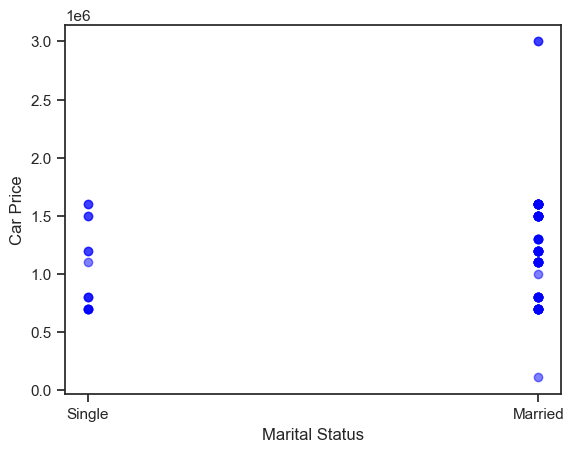

In [21]:
plt.xlabel('Marital Status')
plt.ylabel('Car Price')
plt.scatter(df['Marrital Status'], df['Price'], color='blue', alpha=0.5)
plt.show()
     

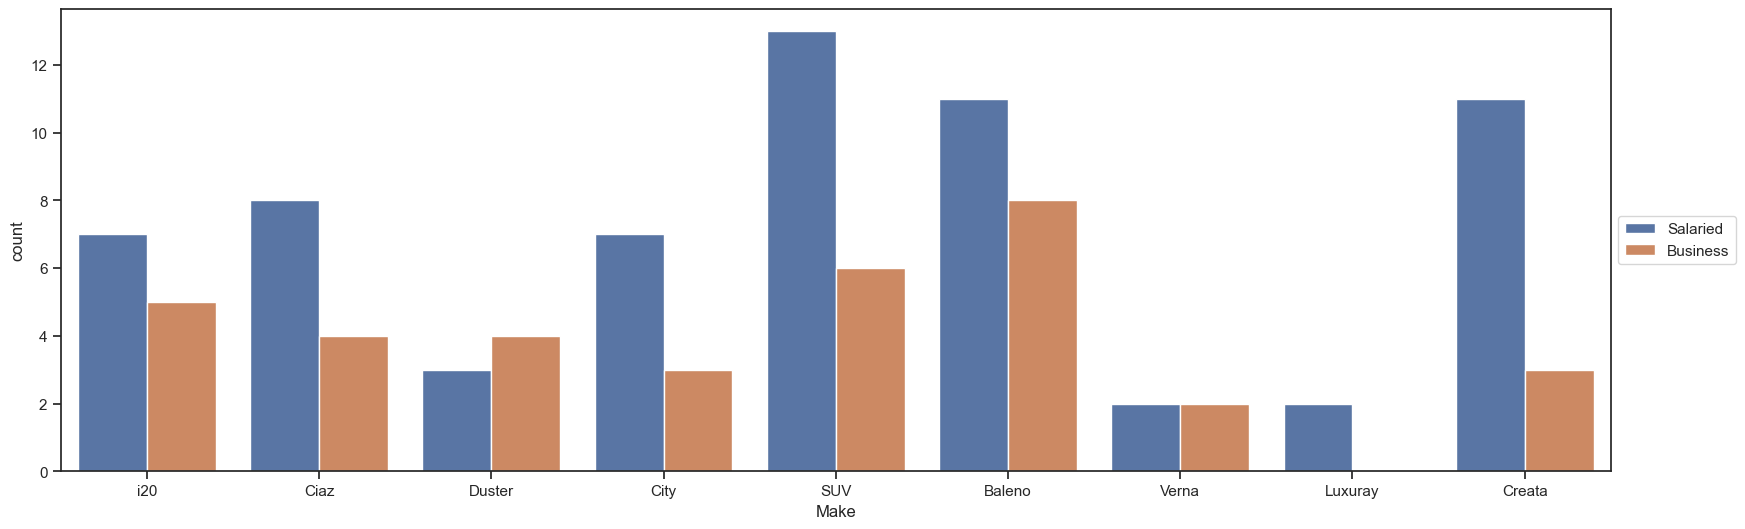

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Profession")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

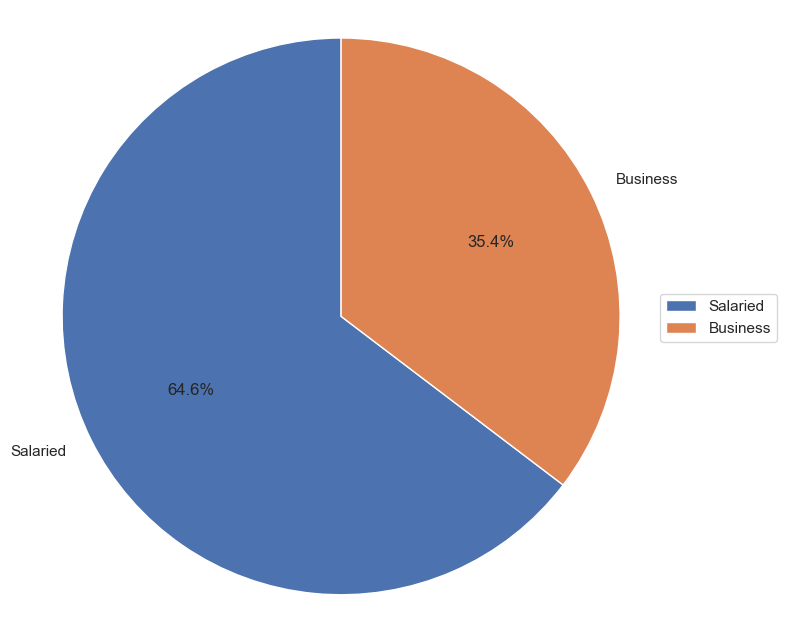

In [23]:
plt.figure(figsize=(8, 8))
profession_counts = df['Profession'].value_counts()
plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

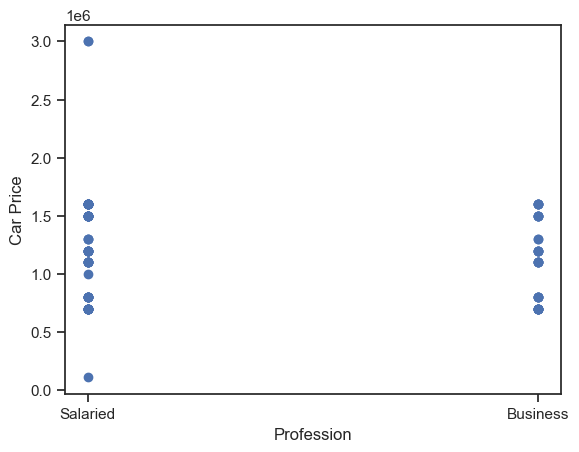

In [24]:
plt.xlabel('Profession')
plt.ylabel('Car Price')
plt.scatter(df['Profession'],df['Price'])
     

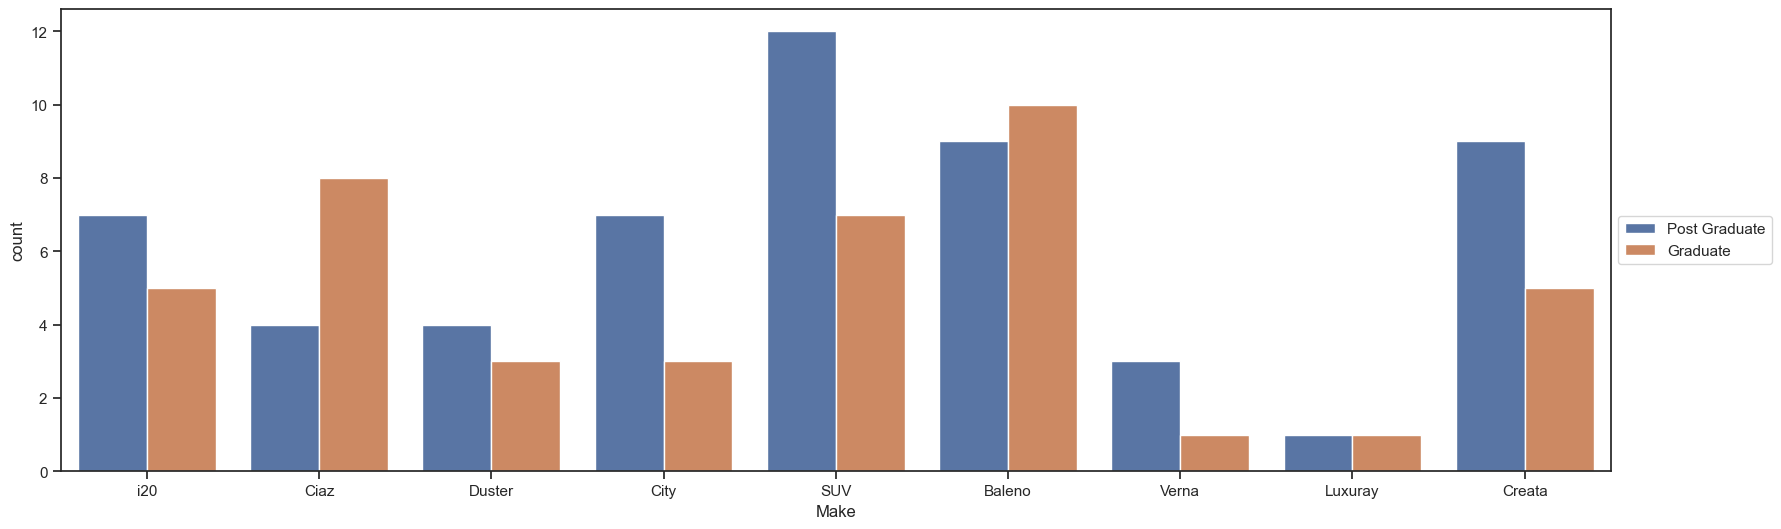

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Education")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

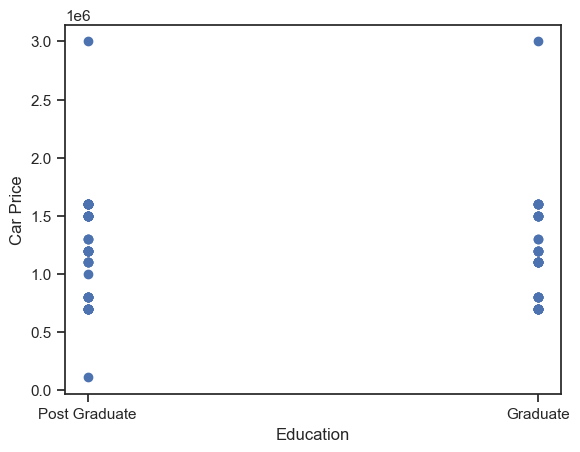

In [26]:
plt.xlabel('Education')
plt.ylabel('Car Price')
plt.scatter(df['Education'],df['Price'])

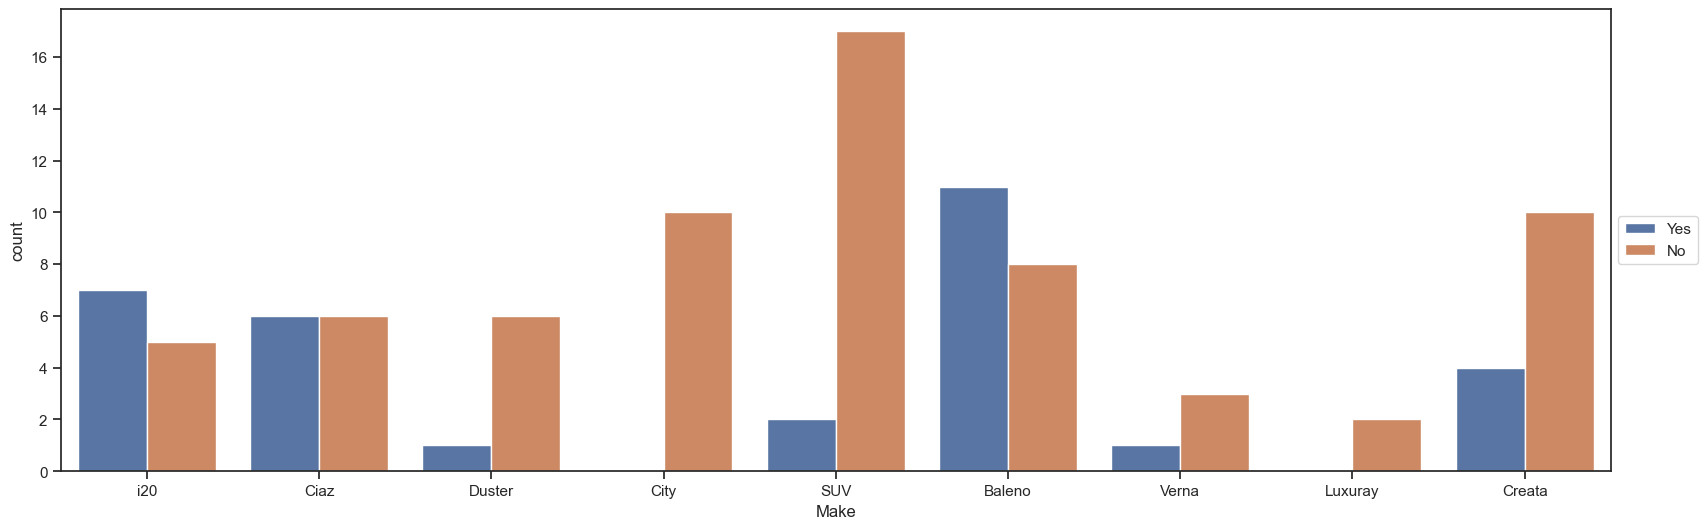

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Personal loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

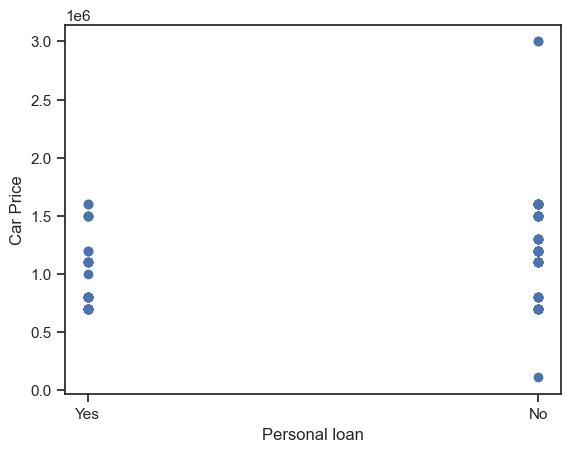

In [28]:
plt.xlabel('Personal loan')
plt.ylabel('Car Price')
plt.scatter(df['Personal loan'],df['Price'])

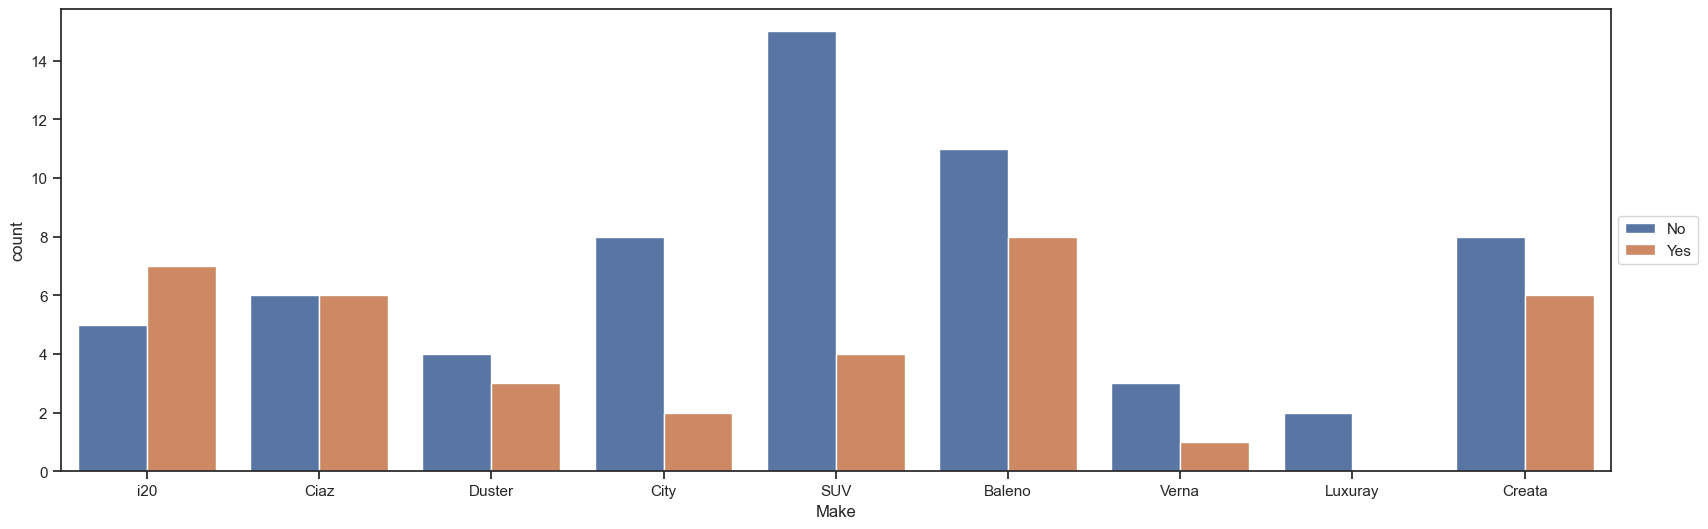

In [29]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="House Loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

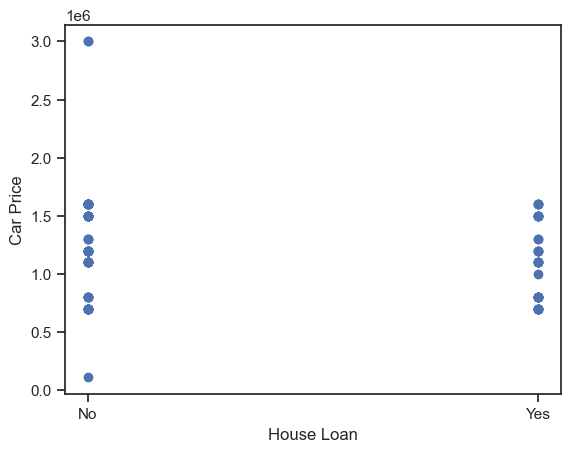

In [30]:
plt.xlabel('House Loan')
plt.ylabel('Car Price')
plt.scatter(df['House Loan'],df['Price'])

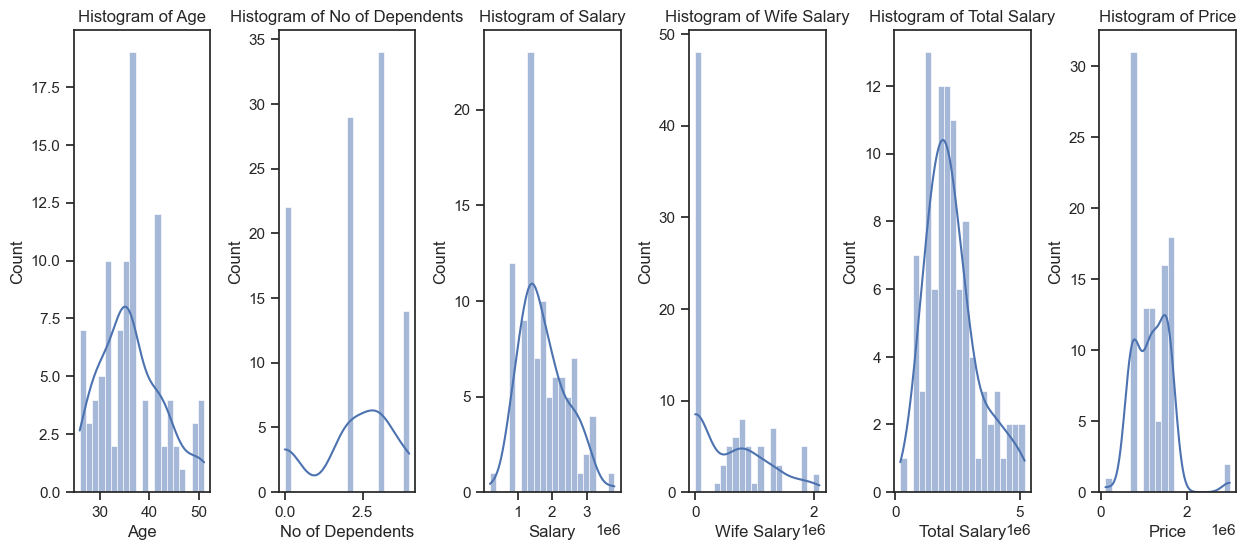

In [31]:
plt.figure(figsize=(15, 6))
n = 0
for x in ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']:
    n += 1
    plt.subplot(1, 6, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], kde=True, bins=20)
    plt.title('Histogram of {}'.format(x))
plt.show()

## Observations

(1) The consumer market is largely driven by individuals in the age range of 25 to 50, indicating a significant presence of this demographic in the vehicle market.

(2) Customers with an average total salary of around 30 lakhs show a higher tendency to invest in vehicles, suggesting a correlation between income level and purchasing decisions.

(3) Most individuals allocate a budget of 10 to 20 lakhs for their vehicle purchases, highlighting a common price range preferred by the majority of customers.

<AxesSubplot:>

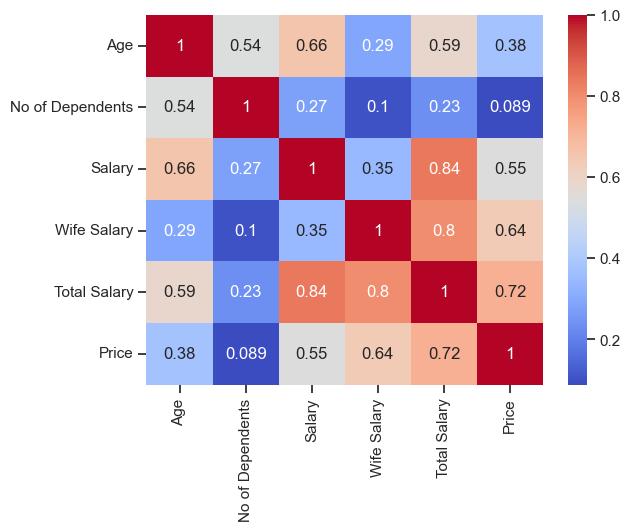

In [32]:
# Heatmap of Correlation
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

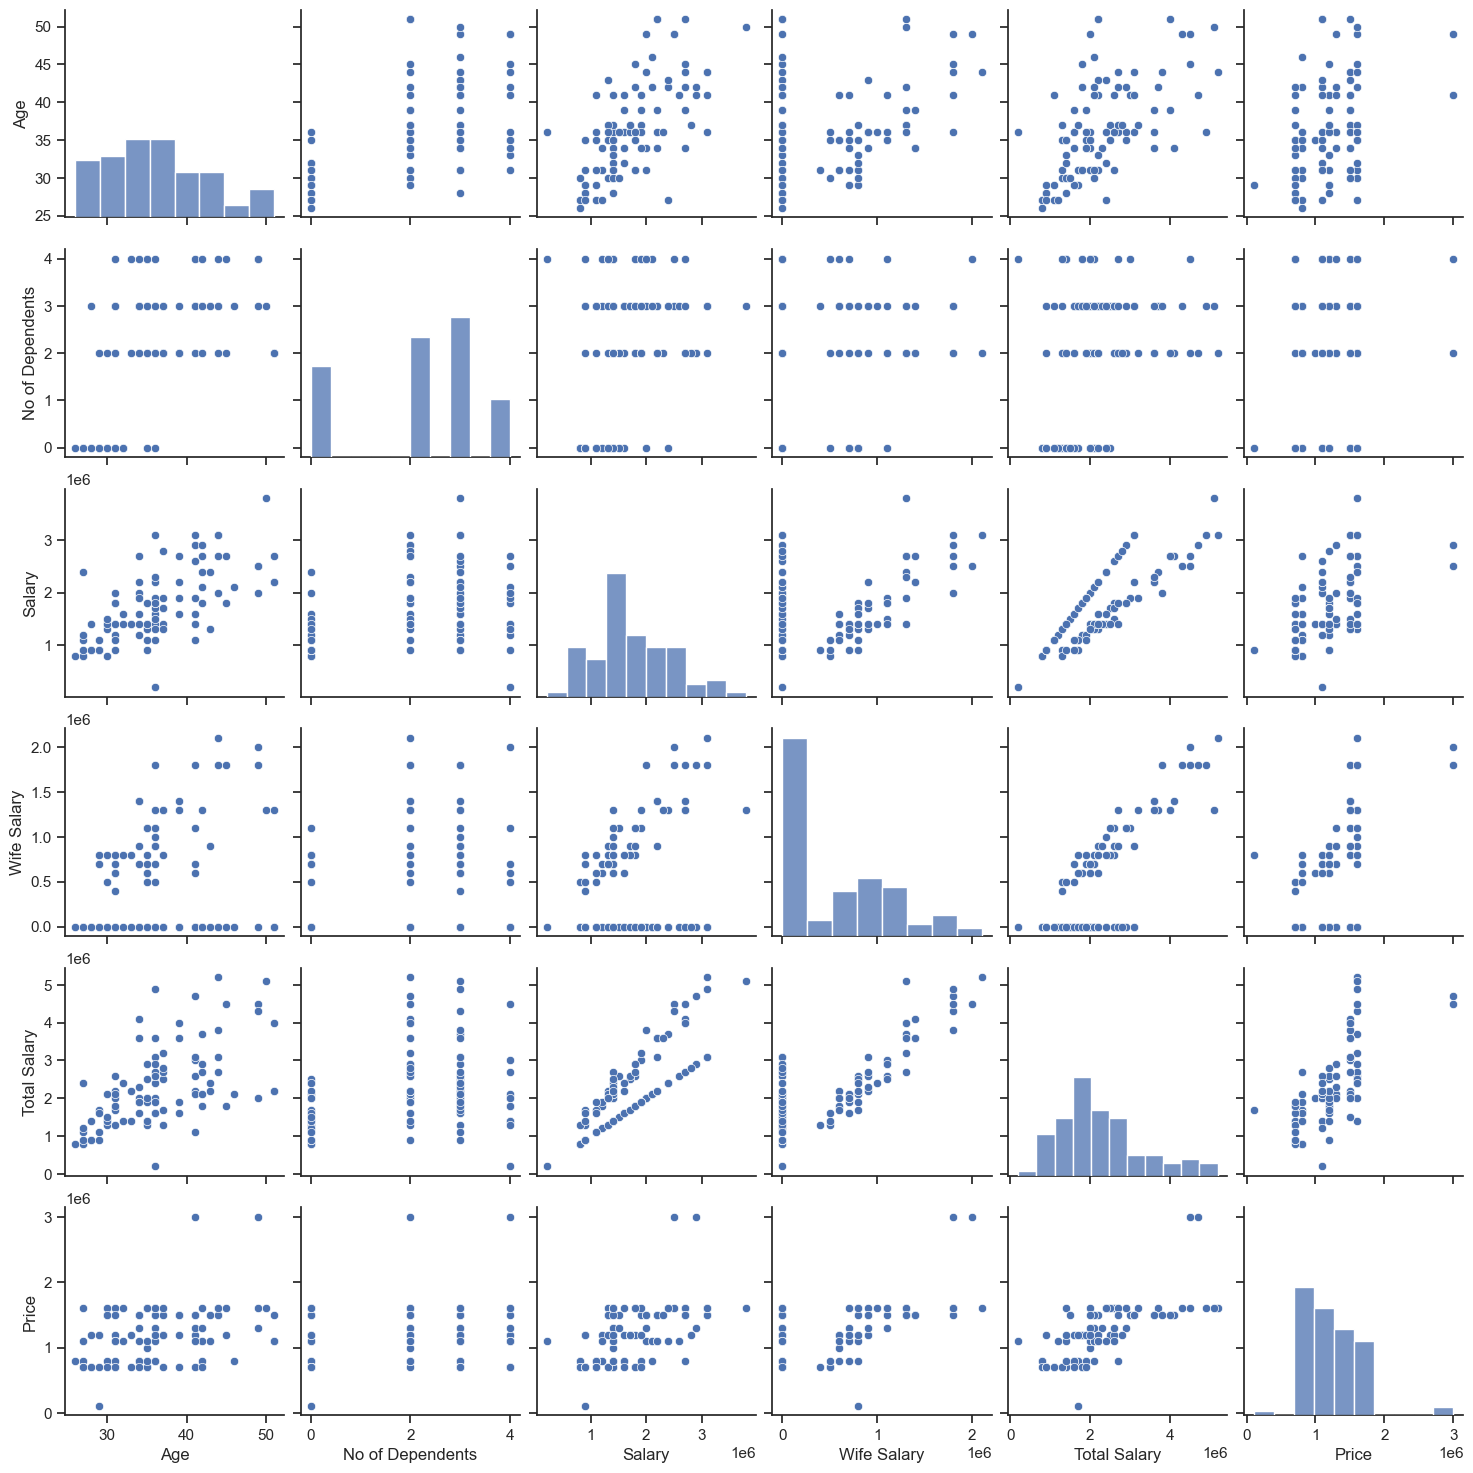

In [33]:
# Pair Plot
sns.pairplot(df)

In [35]:
dff=pd.read_csv('EV Stats-1.csv')

In [36]:
dff.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431.0,692.0,4689.0,0,0.0,3680.0,0.0,9492.0
1,2,Assam,463.0,138.0,1006.0,0,117.0,151.0,0.0,1875.0
2,3,Bihar,252.0,430.0,2148.0,6,64.0,271.0,0.0,3171.0
3,4,Chhattisgarh,613.0,382.0,2078.0,58,106.0,997.0,0.0,4234.0
4,5,Delhi,1395.0,251.0,5018.0,0,1.0,12695.0,21.0,19381.0


In [37]:
dff.tail()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
30,31,Total,27549.0,14069.0,112538.0,389,720.0,105571.0,27.0,260863.0
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Source,Electric Vehicles Sales report in india - 2018,NaN,NaN,NaN,https://electricvehicles.in/electric-vehicles-...,NaN,NaN,NaN,NaN
33,Additional,Sales of electric vehicles across India from f...,NaN,NaN,NaN,https://www.statista.com/statistics/1234761/in...,NaN,NaN,NaN,NaN
34,Additional,Reasons for preferring an electric car over a ...,NaN,NaN,NaN,statista.com/statistics/1027483/india-electric...,NaN,NaN,NaN,NaN


In [38]:
new_df = dff.drop(dff.tail(5).index)

In [39]:
new_df.tail()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
25,26,Uttarkhand,423.0,168.0,3239.0,45,38.0,265.0,0.0,4178.0
26,27,West Bengal,1451.0,65.0,10781.0,3,0.0,1840.0,0.0,14140.0
27,28,Andaman & Nicobar islands,0.0,0.0,0.0,0,0.0,82.0,0.0,82.0
28,29,Chandigarh,612.0,18.0,896.0,0,0.0,974.0,0.0,2500.0
29,30,Dadra and Nagar Haveli,4.0,0.0,9.0,0,0.0,803.0,0.0,816.0


In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Sl. No                                                              30 non-null     object 
 1   State                                                               30 non-null     object 
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     float64
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     float64
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     float64
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     object 
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     float64
 7   Passenger Cars (Cat

In [41]:
new_df['Sl. No'] = new_df['Sl. No'].astype('int64')
new_df['Three Wheelers (Category L5 slow speed as per CMVR)']=new_df['Three Wheelers (Category L5 slow speed as per CMVR)'].astype('int64')

In [42]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Sl. No                                                              30 non-null     int64  
 1   State                                                               30 non-null     object 
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     float64
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     float64
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     float64
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     int64  
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     float64
 7   Passenger Cars (Cat

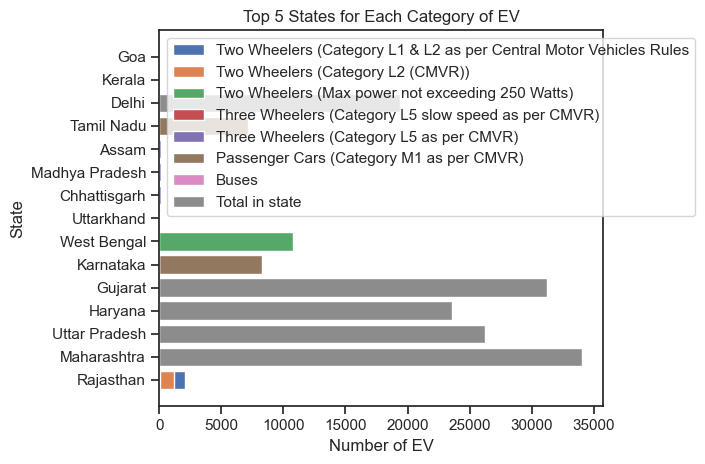

In [43]:
# Define the categories
categories = [
    'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
    'Two Wheelers (Category L2 (CMVR))',
    'Two Wheelers (Max power not exceeding 250 Watts)',
    'Three Wheelers (Category L5 slow speed as per CMVR)',
    'Three Wheelers (Category L5 as per CMVR)',
    'Passenger Cars (Category M1 as per CMVR)',
    'Buses',
    'Total in state'
]

# Create a figure and axes
fig, ax = plt.subplots()

# Iterate over the categories
for category in categories:
    # Sort the DataFrame by the current category and get the top 5 states
    top_states = new_df.sort_values(category, ascending=True).tail(5)

    # Plot the horizontal bar chart for the current category
    ax.barh(top_states['State'], top_states[category], label=category)

# Set the title and labels
ax.set_title('Top 5 States for Each Category of EV')
ax.set_xlabel('Number of EV')
ax.set_ylabel('State')

plt.tight_layout()
ax.legend()
plt.show()
     

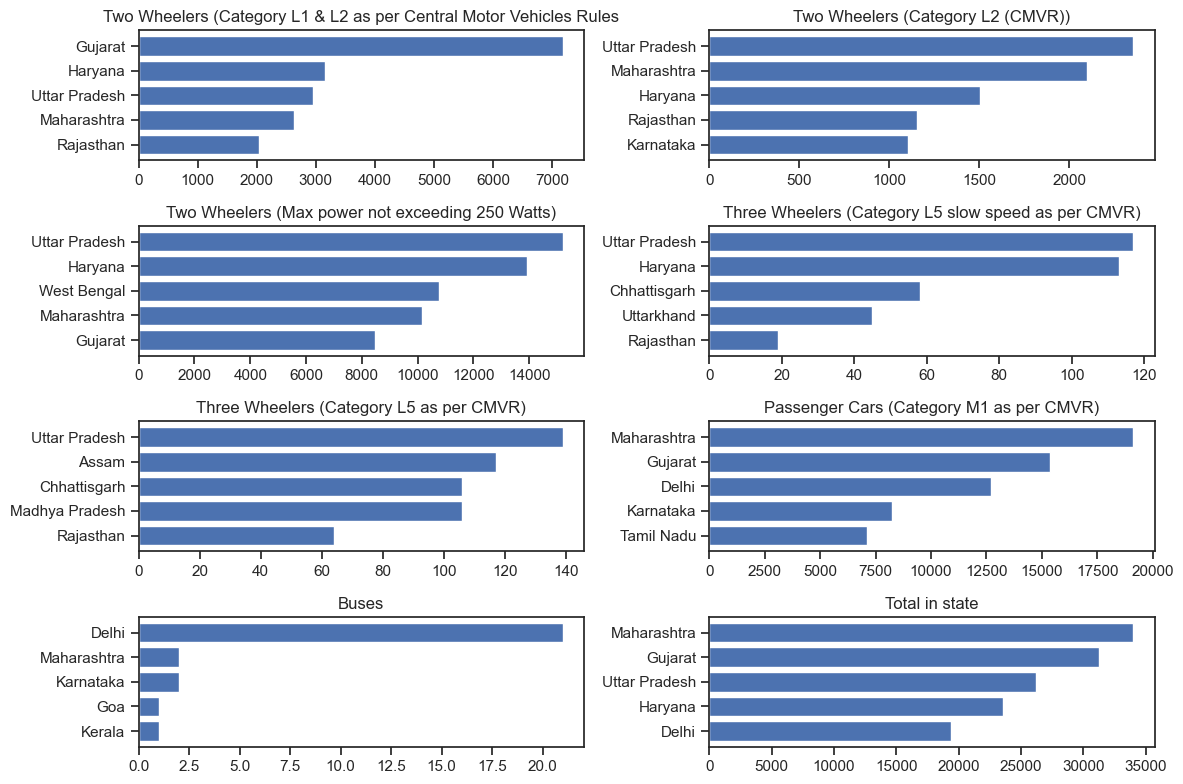

In [44]:
# Calculate the number of rows and columns for the subplots
num_rows = (len(categories) - 1) // 2 + 1
num_cols = min(2, len(categories))

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Iterate over the categories and corresponding subplots
for i, category in enumerate(categories):
    # Calculate the subplot indices
    row = i // num_cols
    col = i % num_cols

    # Sort the DataFrame by the current category and get the top 5 states
    top_states = new_df.sort_values(category, ascending=True).tail(5)

    # Plot the horizontal bar chart for the current category in the corresponding subplot
    axs[row, col].barh(top_states['State'], top_states[category])
    axs[row, col].set_title(category)

plt.tight_layout()
plt.show()

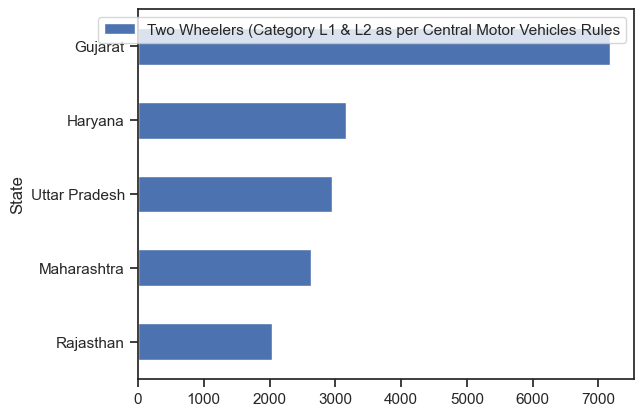

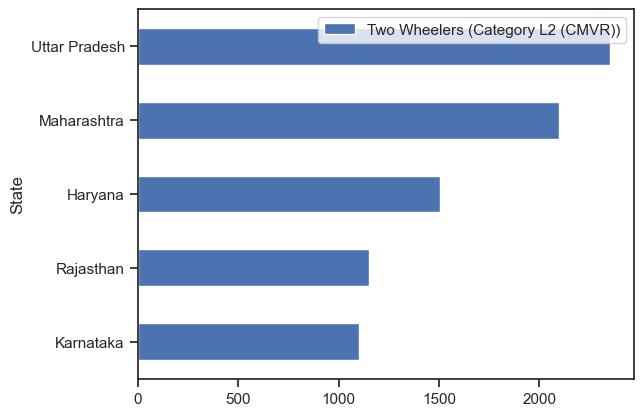

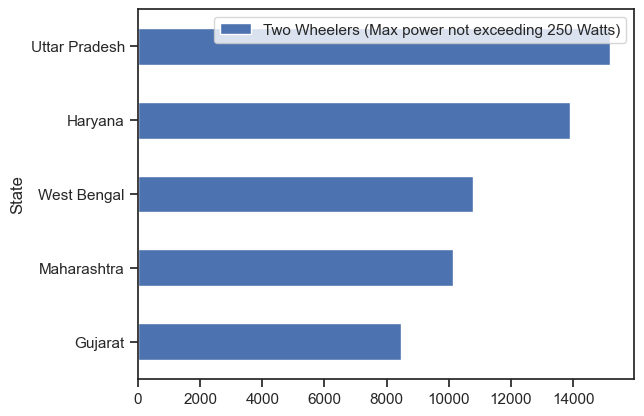

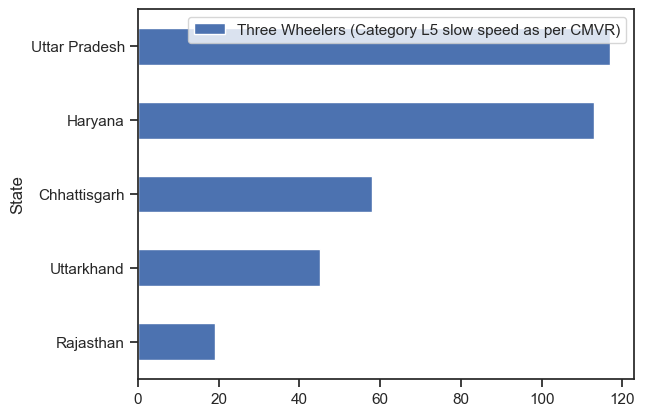

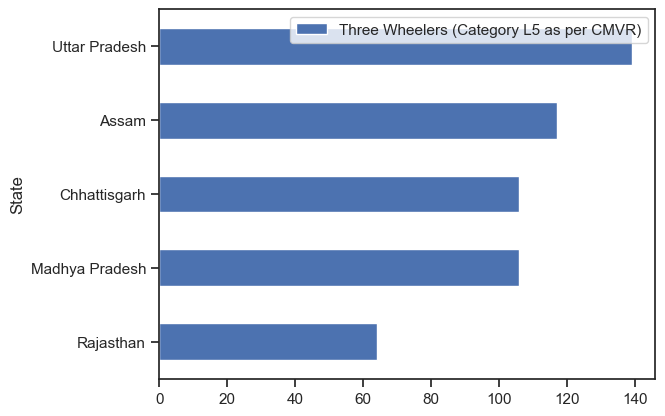

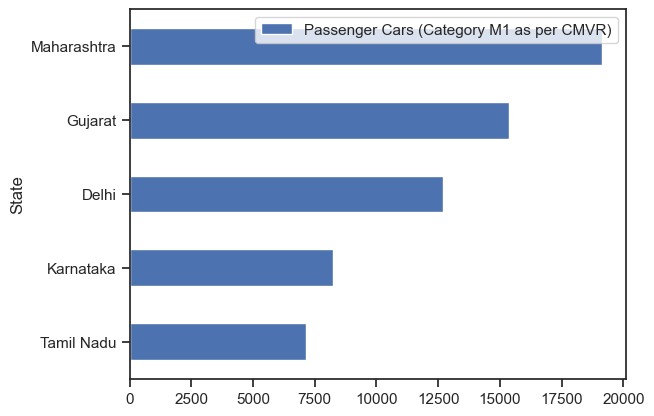

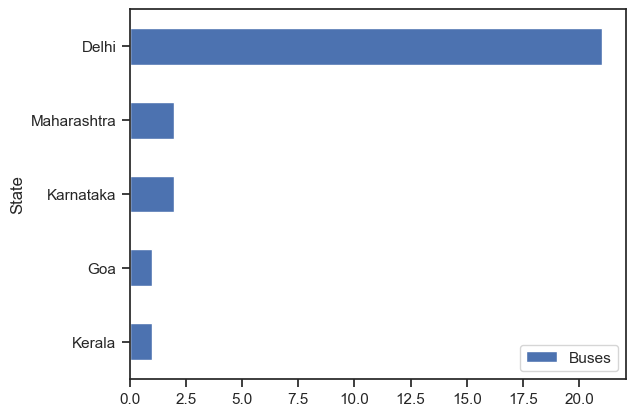

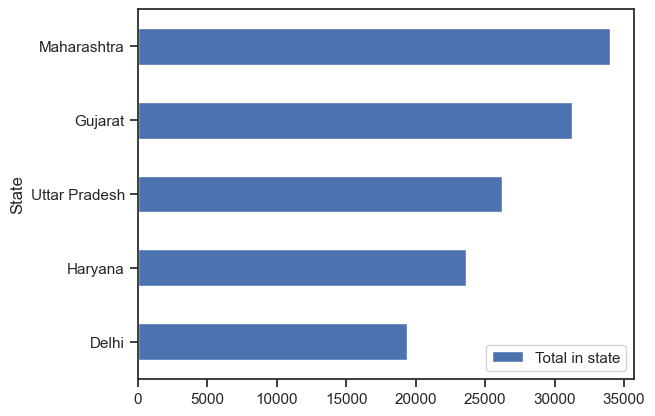

In [45]:
# Top 5 states for each category of EV
for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
  ax = new_df.sort_values(y, ascending=True).tail(5).plot.barh(x='State', y=y)

### K-Means Clustering

In [46]:
X = df.iloc[:,df.columns!='Make']
X.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


In [47]:
encoding = {"Profession":{"Salaried": 0, "Business": 1},
            "Marrital Status":{"Single": 0, "Married": 1},
            "Education":{"Graduate": 0, "Post Graduate": 1},
            "Personal loan":{"No": 0, "Yes": 1},
            "House Loan":{"No": 0, "Yes": 1},
            "Wife Working":{"No": 0, "Yes": 1}
            }

In [48]:
obj_df = X.replace(encoding)
obj_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,0,0,1,0,1,0,0,800000,0,800000,800000
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,1,1,0,4,1,1,0,1800000,0,1800000,1200000
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,1600000


In [49]:
print(obj_df.dtypes)

Age                 int64
Profession          int64
Marrital Status     int64
Education           int64
No of Dependents    int64
Personal loan       int64
House Loan          int64
Wife Working        int64
Salary              int64
Wife Salary         int64
Total Salary        int64
Price               int64
dtype: object


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [51]:
X_scaled = StandardScaler().fit_transform(obj_df)
X_scaled = pd.DataFrame(X_scaled,columns=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                                          'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                                          'Total Salary','Price'])
x = X_scaled.to_numpy()
X_scaled
     

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,-1.498630,-0.739510,-2.366432,0.876275,-1.642313,1.446980,-0.772512,-1.051847,-1.397118,-0.887055,-1.406760,-0.904843
1,-0.211304,-0.739510,0.422577,0.876275,-0.136859,1.446980,1.294479,0.950708,-0.501877,0.108995,-0.258937,-0.445579
2,1.397855,1.352247,0.422577,-1.141195,1.368594,1.446980,1.294479,-1.051847,0.094950,-0.887055,-0.450240,0.013685
3,0.754191,1.352247,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,-0.203464,0.108995,-0.067633,0.013685
4,-0.854967,-0.739510,0.422577,0.876275,-0.136859,1.446980,-0.772512,0.950708,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,1.352247,-2.366432,-1.141195,-1.642313,-0.691095,-0.772512,-1.051847,0.990190,-0.887055,0.123671,0.932213
95,2.202434,-0.739510,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,3.079085,1.271054,2.706274,0.932213
96,2.363350,1.352247,0.422577,-1.141195,-0.136859,1.446980,1.294479,-1.051847,0.691777,-0.887055,-0.067633,-0.215947
97,2.363350,-0.739510,0.422577,0.876275,-0.136859,-0.691095,-0.772512,0.950708,1.437811,1.271054,1.654102,0.702581


In [52]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\viresh acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


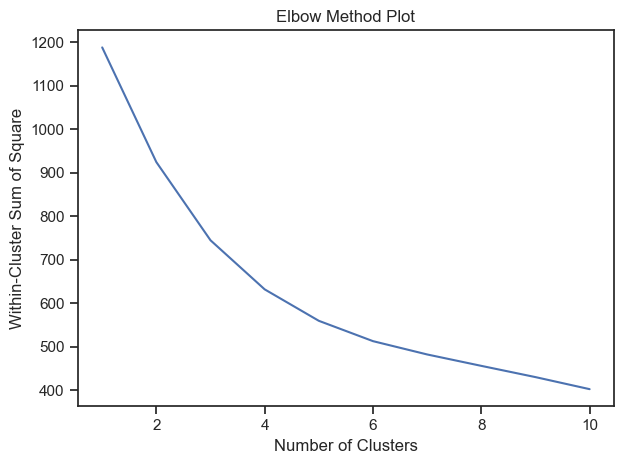

In [53]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

### Assuming K=3

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(X_scaled)
KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=3, random_state=42)

In [55]:
y = kmeans.predict(X_scaled)
y_df = pd.DataFrame(y,columns=['Class'])

In [56]:
final_data1 = pd.concat([df,y_df],axis=1)
final_data1

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,2
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,1
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,0
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,1
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,2
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,1


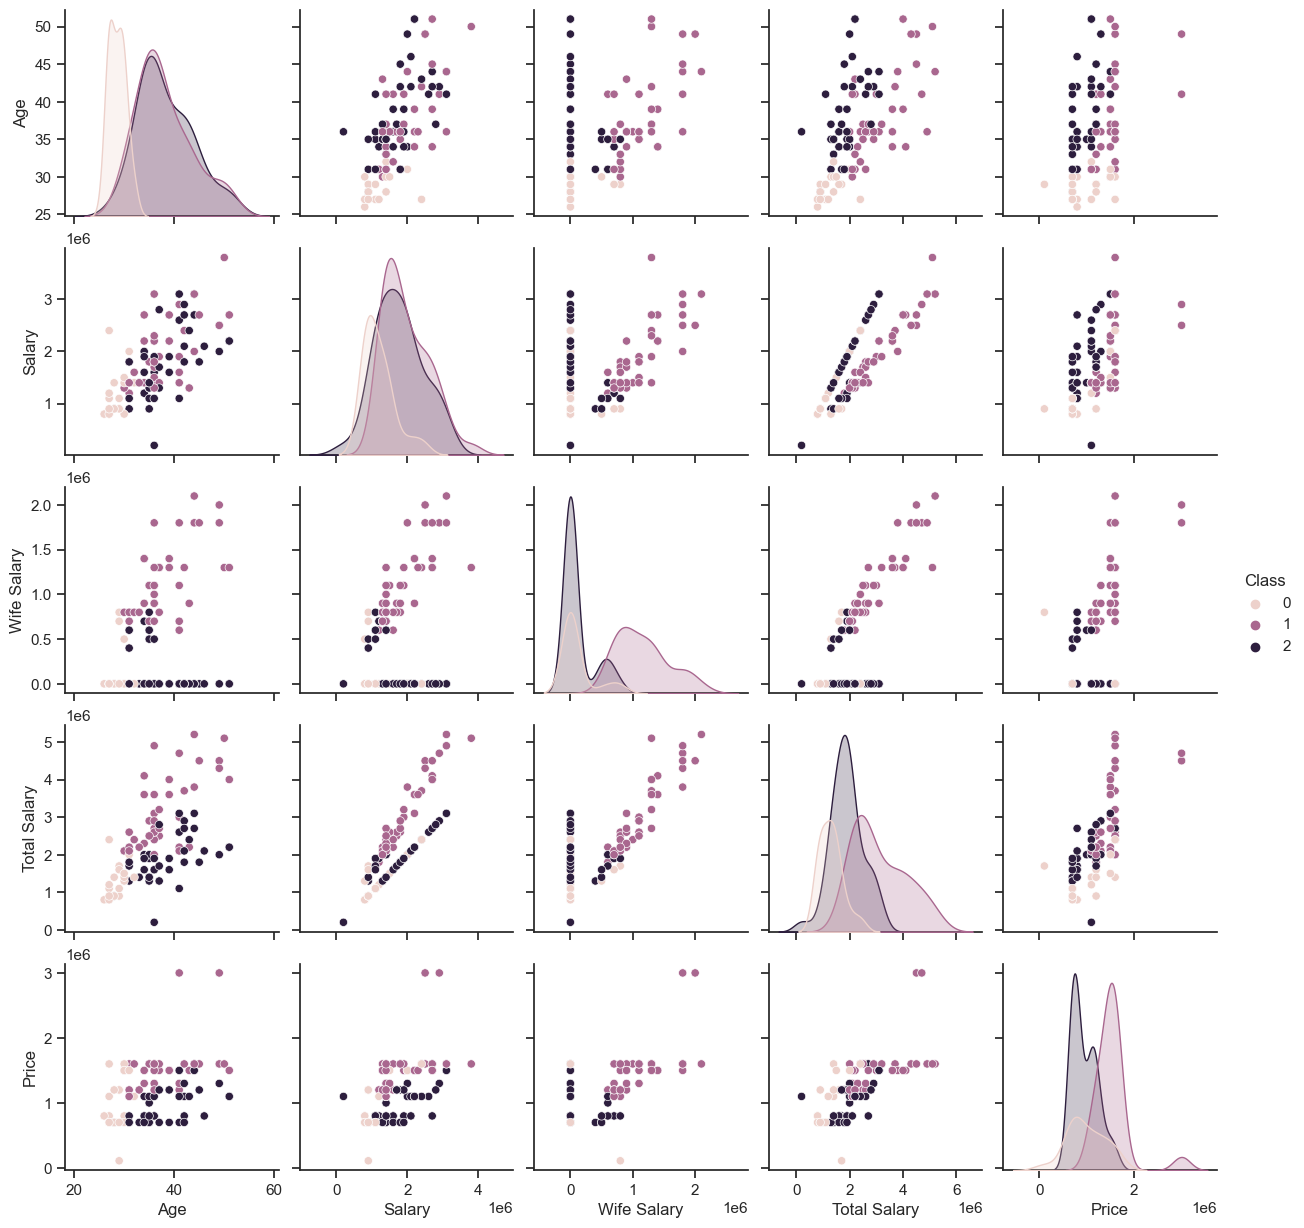

In [57]:
sns.pairplot(final_data1,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')
     

### For K=5

In [58]:
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans1.fit(X_scaled)
KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=5, random_state=42)

In [59]:
y1 = kmeans1.predict(X_scaled)
y1_df = pd.DataFrame(y1,columns=['Class'])

In [60]:
final_data2 = pd.concat([df,y1_df],axis=1)
final_data2

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,1
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,4
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,4
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,0
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,1
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,3
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,4
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,3


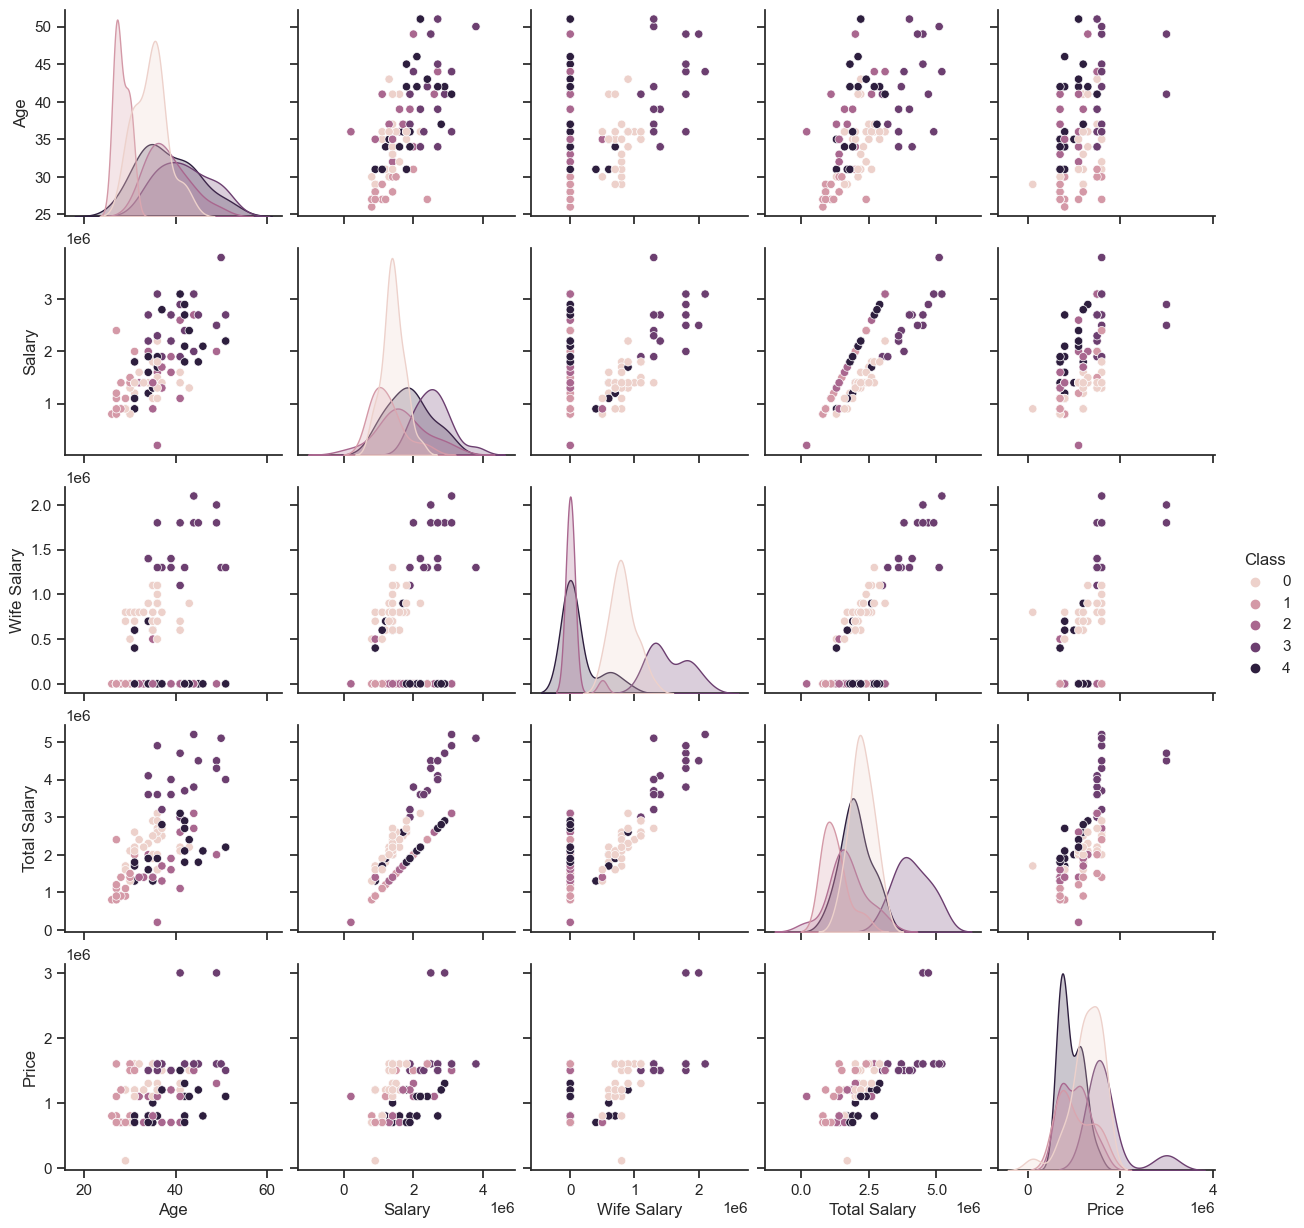

In [61]:
sns.pairplot(final_data2,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')


In [62]:
df_charge = pd.read_csv("Electric_Vehical_charging_station.csv")
df_charge.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [63]:
df_charge.head(-20)

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service
...,...,...,...,...,...,...,...,...,...
177,178,NDMC,"Near NDMC Office, Fire Brigade Lane, Barakhamb...","Electric Vehicle Charger, Near NDMC Office, Fi...",28.630448,77.225558,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
178,179,NDMC,"Near NDMC Office, Fire Brigade Lane, Barakhamb...","Electric Vehicle Charger, Near NDMC Office, Fi...",28.630448,77.225558,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
179,180,NDMC,"Talkatora Stadium, President's Estate, New Del...","Electric Vehicle Charger, Talkatora Stadium, P...",28.625294,77.195234,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
180,181,NDMC,"Talkatora Garden, President's Estate, New Delh...","Electric Vehicle Charger, Talkatora Garden, Pr...",28.624836,77.195244,CCS/ChADEMO/ Type 2 AC,142kW,Self Service


In [64]:
df_charge.region.unique()

array(['NDMC', 'CMRL', 'Maha Metro', 'Noida Authority', 'SDMC', 'NKDA',
       'NRANVP', 'ANERT'], dtype=object)

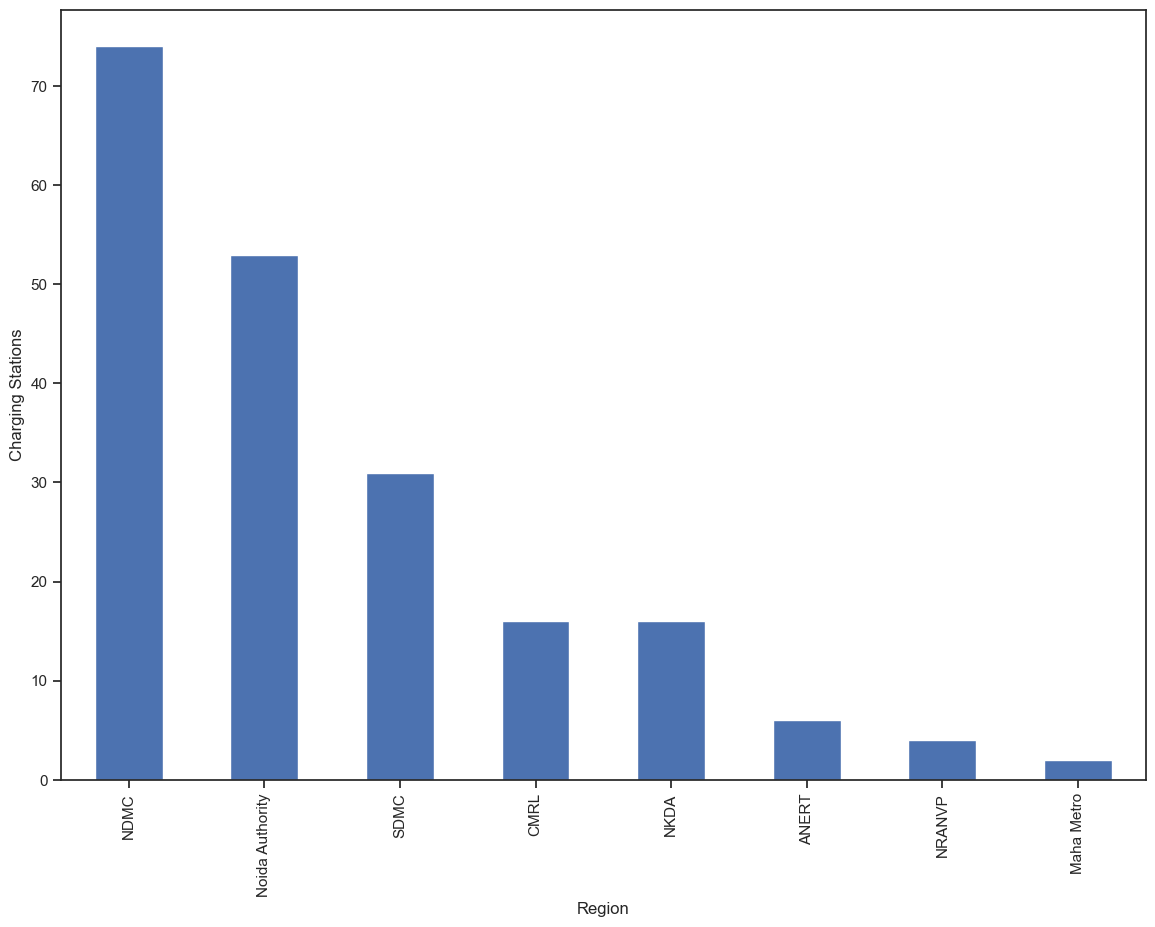

In [65]:
plt.figure(figsize=(14,10))
df_charge.region.value_counts().plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Charging Stations")
plt.show()

## Observations

In the future, the adoption of electric vehicles is expected to significantly increase, particularly in two regions where there is a higher concentration of electric vehicle charging stations compared to other areas:

(1) NDMC (New Delhi)

(2) Noida Authority (City in Uttar Pradesh)

These regions are likely to experience a greater surge in electric vehicle usage due to the existing infrastructure of charging stations, indicating a favorable environment for electric vehicle adoption and support.